In [1]:
from PIL import Image
import io
import numpy as np
import time

import selenium
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
import chromedriver_binary
from selenium import webdriver

In [2]:
selenium.__version__

'3.141.0'

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
mining_screen = plt.imread('alien_images/1.png')

In [7]:
loading_screen = plt.imread('alien_images/2.png')
finish_mining = plt.imread('alien_images/3.png')
finish_mining_2 = plt.imread('alien_images/4.png')

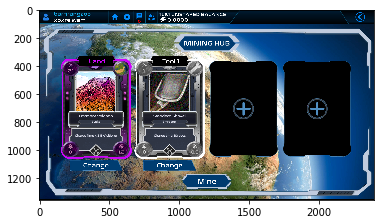

In [21]:
plt.imshow(mining_screen)

In [2]:
driver = selenium.webdriver.Chrome()  # Optional argument, if not specified will search path.
driver.get('https://play.alienworlds.io/')

In [10]:
canvas = driver.find_element_by_id('unityContainer')


style_element = [x.strip() for x in canvas.get_attribute('style').split(';')]
width = int(style_element[0].split(' ')[-1][:-2])
height = int(style_element[1].split(' ')[-1][:-2])

In [189]:

canvas = driver.find_element_by_id('#canvas')
width = int(canvas.get_attribute('width'))
height = int(canvas.get_attribute('height'))

mining_height_ratio = 700 / height
mining_width_ratio = 1/2

In [350]:
canvas

<selenium.webdriver.remote.webelement.WebElement (session="58ca07ddf735d7a4da229b1335f50498", element="52978b02-ac65-4c9e-a8bc-cc94cc876272")>

In [9]:
width, height

(1036, 674)

In [3]:
def press_mining(posx=0, posy=0):
    action = webdriver.common.action_chains.ActionChains(driver)
    action.move_to_element_with_offset(canvas, posx, posy)
    action.click()
    action.perform()

In [15]:
mining_pos = (510, 600)
claim_pos = (510, 400)
return_to_mining_pos = (250, 560)

possible_error_click = [[760,200], 
                        [760,225],
                        [760,250],
                        [760,275],
                        [760,300]]

In [72]:
press_mining(*return_to_mining_pos)

In [60]:
press_mining(*mining_pos)

In [69]:
press_mining(*claim_pos)

In [ ]:
from IPython.display import clear_output

error=False

states = ['pre_mine', 'pre_claim', 'pre_return', 'error']
state='pre_mine'

try:
    while True:
        clear_output(wait=True)
        if state == 'pre_mine':
            print('Prepare to mine')
            while not check_if_can_mine():
                error=check_if_error()
                if error: 
                    state = 'error'
                    break
            if state == 'error':
                continue
                time.sleep(20)
            press_mining(*mining_pos)
            state='pre_claim'

        if state == 'pre_claim':
            print('Prepare to claim')
            while not check_if_can_claim():
                error=check_if_error()
                if error: 
                    state = 'error'
                    break
            if state == 'error':
                continue
                time.sleep(20)
            press_mining(*claim_pos)
            state = 'pre_return'

        if state == 'pre_return':
            print('Prepare to return')
            while not check_if_can_return():
                print('eee')
                error=check_if_error()
                print(error)
                if error: 
                    state = 'error'
                    break
            if state == 'error':
                continue 
                time.sleep(20)
            press_mining(*return_to_mining_pos)
            state = 'pre_mine'
            
        if state == 'error':
            print('Fix error')
            for coord in possible_error_click:
                press_mining(*coord)
            
            if check_if_can_mine(): state = 'pre_mine'
            if check_if_can_claim(): state = 'pre_claim'
            if check_if_can_return(): state = 'pre_return'
                
except KeyboardInterrupt:
    pass

Prepare to mine


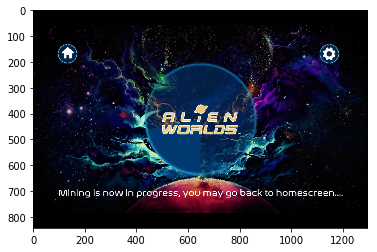

In [28]:
data = driver.get_screenshot_as_png()

img = Image.open(io.BytesIO(data))

claim_button = np.asarray(img)

plt.imshow(claim_button)

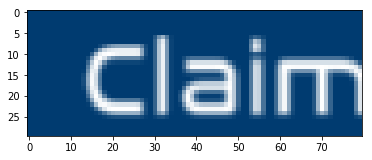

In [65]:
data = driver.get_screenshot_as_png()

img = Image.open(io.BytesIO(data))

claim_button = np.asarray(img)

plt.imshow(claim_button[500:530, 600:680])

In [57]:
check_if_can_return()

True

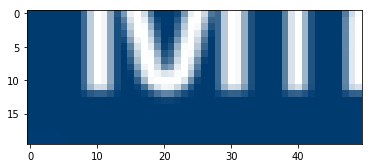

In [51]:
data = driver.get_screenshot_as_png()

img = Image.open(io.BytesIO(data))

return_to_mine = np.asarray(img)

plt.imshow(return_to_mine[680:700, 250:300])

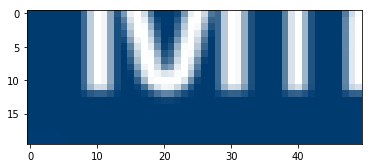

In [54]:
plt.imshow(return_to_mine_ref)

In [42]:
plt.imsave('alien_images/return_to_mine', return_to_mine[640:670, 250:350])

In [66]:
plt.imsave('alien_images/claim_button', claim_button[500:530, 600:680])

In [17]:
mining_button_ref = plt.imread('alien_images/mining_button.png')
claim_button_ref = plt.imread('alien_images/claim_button.png')
return_to_mine_ref = plt.imread('alien_images/return_to_mine.png')
error_to_mine_ref = plt.imread('alien_images/error.png')

def check_if_can_mine():
    data = driver.get_screenshot_as_png()
    img = Image.open(io.BytesIO(data))
    mining_button = np.asarray(img)[740:760, 600:650].astype(np.float32) / 255.
    return (np.mean(np.abs(mining_button_ref - mining_button)) < 0.01)

def check_if_can_claim():
    data = driver.get_screenshot_as_png()
    img = Image.open(io.BytesIO(data))
    mining_button = np.asarray(img)[500:530, 600:680].astype(np.float32) / 255.
    return (np.mean(np.abs(claim_button_ref - mining_button)) < 0.01)

def check_if_can_return():
    data = driver.get_screenshot_as_png()
    img = Image.open(io.BytesIO(data))
    mining_button = np.asarray(img)[680:700, 250:300].astype(np.float32) / 255.
    return (np.mean(np.abs(return_to_mine_ref - mining_button)) < 0.01)

def check_if_error():
    data = driver.get_screenshot_as_png()
    img = Image.open(io.BytesIO(data))
    mining_button = np.asarray(img)[310:330, 600:700].astype(np.float32) / 255.
    return (np.mean(np.abs(error_to_mine_ref - mining_button)) < 0.01)

In [341]:
press_mining(*return_to_mining_pos)

559 518


In [68]:
check_if_can_claim()

True

In [303]:
data = driver.get_screenshot_as_png()
img = Image.open(io.BytesIO(data))
tmp = np.asarray(img)[740:760, 600:650].astype(np.float32) / 255.

In [281]:
np.mean(mining_button_ref - tmp) < 1e-8

True

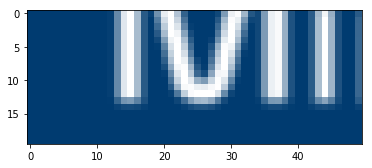

In [291]:
plt.imshow(mining_button_ref)